In [1]:
!gdown 1V5B7Bt6aJm0UHbR7cRKBEK8jx7lYPVuX

Downloading...
From (original): https://drive.google.com/uc?id=1V5B7Bt6aJm0UHbR7cRKBEK8jx7lYPVuX
From (redirected): https://drive.google.com/uc?id=1V5B7Bt6aJm0UHbR7cRKBEK8jx7lYPVuX&confirm=t&uuid=216dabf5-bdd4-4f6a-a7b1-29ac1912be9d
To: /home/xy/Desktop/ml/timeseries/eeg-data.csv
100%|████████████████████████████████████████| 106M/106M [00:04<00:00, 22.6MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import keras
from keras import layers
import tensorflow as tf
from sklearn import preprocessing, model_selection
import random

QUALITY_THRESHOLD = 128
BATCH_SIZE = 21
SHUFFLE_BUFFER_SIZE = BATCH_SIZE * 2

2025-11-07 11:16:57.571480: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
eeg = pd.read_csv("eeg-data.csv")

In [4]:
unlabeled_eeg = eeg[eeg["label"] == "unlabeled"]
eeg = eeg.loc[eeg["label"] != "unlabeled"]
eeg = eeg.loc[eeg["label"] != "everyone paired"]

eeg.drop(
    [
        "indra_time",
        "Unnamed: 0",
        "browser_latency",
        "reading_time",
        "attention_esense",
        "meditation_esense",
        "updatedAt",
        "createdAt",
    ],
    axis=1,
    inplace=True,
)

eeg.reset_index(drop=True, inplace=True)
eeg.head()

,id,eeg_power,raw_values,signal_quality,label
0,7,"[56887.0, 45471.0, 20074.0, 5359.0, 22594.0, 7...","[99.0, 96.0, 91.0, 89.0, 91.0, 89.0, 87.0, 93....",0,blinkInstruction
1,5,"[11626.0, 60301.0, 5805.0, 15729.0, 4448.0, 33...","[23.0, 40.0, 64.0, 89.0, 86.0, 33.0, -14.0, -1...",0,blinkInstruction
2,1,"[15777.0, 33461.0, 21385.0, 44193.0, 11741.0, ...","[41.0, 26.0, 16.0, 20.0, 34.0, 51.0, 56.0, 55....",0,blinkInstruction
3,13,"[311822.0, 44739.0, 19000.0, 19100.0, 2650.0, ...","[208.0, 198.0, 122.0, 84.0, 161.0, 249.0, 216....",0,blinkInstruction
4,4,"[687393.0, 10289.0, 2942.0, 9874.0, 1059.0, 29...","[129.0, 133.0, 114.0, 105.0, 101.0, 109.0, 99....",0,blinkInstruction


In [5]:
def convert_string_data_to_values(value_string):
    str_list = json.loads(value_string)
    return str_list


eeg["raw_values"] = eeg["raw_values"].apply(convert_string_data_to_values)

eeg = eeg.loc[eeg["signal_quality"] < QUALITY_THRESHOLD]
eeg.head()

,id,eeg_power,raw_values,signal_quality,label
0,7,"[56887.0, 45471.0, 20074.0, 5359.0, 22594.0, 7...","[99.0, 96.0, 91.0, 89.0, 91.0, 89.0, 87.0, 93....",0,blinkInstruction
1,5,"[11626.0, 60301.0, 5805.0, 15729.0, 4448.0, 33...","[23.0, 40.0, 64.0, 89.0, 86.0, 33.0, -14.0, -1...",0,blinkInstruction
2,1,"[15777.0, 33461.0, 21385.0, 44193.0, 11741.0, ...","[41.0, 26.0, 16.0, 20.0, 34.0, 51.0, 56.0, 55....",0,blinkInstruction
3,13,"[311822.0, 44739.0, 19000.0, 19100.0, 2650.0, ...","[208.0, 198.0, 122.0, 84.0, 161.0, 249.0, 216....",0,blinkInstruction
4,4,"[687393.0, 10289.0, 2942.0, 9874.0, 1059.0, 29...","[129.0, 133.0, 114.0, 105.0, 101.0, 109.0, 99....",0,blinkInstruction


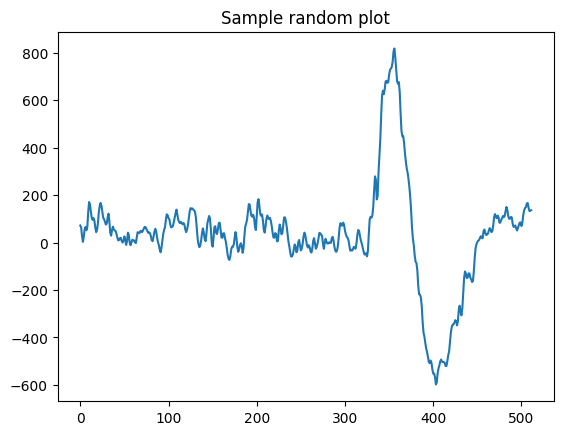

In [6]:
def view_eeg_plot(idx):
    data = eeg.loc[idx, "raw_values"]
    plt.plot(data)
    plt.title(f"Sample random plot")
    plt.show()


view_eeg_plot(7)

In [7]:
print("Before replacing labels")
print(eeg["label"].unique(), "\n")
print(len(eeg["label"].unique()), "\n")


eeg.replace(
    {
        "label": {
            "blink1": "blink",
            "blink2": "blink",
            "blink3": "blink",
            "blink4": "blink",
            "blink5": "blink",
            "math1": "math",
            "math2": "math",
            "math3": "math",
            "math4": "math",
            "math5": "math",
            "math6": "math",
            "math7": "math",
            "math8": "math",
            "math9": "math",
            "math10": "math",
            "math11": "math",
            "math12": "math",
            "thinkOfItems-ver1": "thinkOfItems",
            "thinkOfItems-ver2": "thinkOfItems",
            "video-ver1": "video",
            "video-ver2": "video",
            "thinkOfItemsInstruction-ver1": "thinkOfItemsInstruction",
            "thinkOfItemsInstruction-ver2": "thinkOfItemsInstruction",
            "colorRound1-1": "colorRound1",
            "colorRound1-2": "colorRound1",
            "colorRound1-3": "colorRound1",
            "colorRound1-4": "colorRound1",
            "colorRound1-5": "colorRound1",
            "colorRound1-6": "colorRound1",
            "colorRound2-1": "colorRound2",
            "colorRound2-2": "colorRound2",
            "colorRound2-3": "colorRound2",
            "colorRound2-4": "colorRound2",
            "colorRound2-5": "colorRound2",
            "colorRound2-6": "colorRound2",
            "colorRound3-1": "colorRound3",
            "colorRound3-2": "colorRound3",
            "colorRound3-3": "colorRound3",
            "colorRound3-4": "colorRound3",
            "colorRound3-5": "colorRound3",
            "colorRound3-6": "colorRound3",
            "colorRound4-1": "colorRound4",
            "colorRound4-2": "colorRound4",
            "colorRound4-3": "colorRound4",
            "colorRound4-4": "colorRound4",
            "colorRound4-5": "colorRound4",
            "colorRound4-6": "colorRound4",
            "colorRound5-1": "colorRound5",
            "colorRound5-2": "colorRound5",
            "colorRound5-3": "colorRound5",
            "colorRound5-4": "colorRound5",
            "colorRound5-5": "colorRound5",
            "colorRound5-6": "colorRound5",
            "colorInstruction1": "colorInstruction",
            "colorInstruction2": "colorInstruction",
            "readyRound1": "readyRound",
            "readyRound2": "readyRound",
            "readyRound3": "readyRound",
            "readyRound4": "readyRound",
            "readyRound5": "readyRound",
            "colorRound1": "colorRound",
            "colorRound2": "colorRound",
            "colorRound3": "colorRound",
            "colorRound4": "colorRound",
            "colorRound5": "colorRound",
        }
    },
    inplace=True,
)

print("After replacing labels")
print(eeg["label"].unique())
print(len(eeg["label"].unique()))

le = preprocessing.LabelEncoder()  # Generates a look-up table
le.fit(eeg["label"])
eeg["label"] = le.transform(eeg["label"])

Before replacing labels
['blinkInstruction' 'blink1' 'blink2' 'blink3' 'blink4' 'blink5'
 'relaxInstruction' 'relax' 'mathInstruction' 'math1' 'math2' 'math3'
 'math4' 'math5' 'math6' 'math7' 'math8' 'math9' 'math10' 'math11'
 'math12' 'musicInstruction' 'music' 'videoInstruction' 'video-ver1'
 'thinkOfItemsInstruction-ver1' 'thinkOfItems-ver1' 'colorInstruction1'
 'colorInstruction2' 'readyRound1' 'colorRound1-1' 'colorRound1-2'
 'colorRound1-3' 'colorRound1-4' 'colorRound1-5' 'colorRound1-6'
 'readyRound2' 'colorRound2-1' 'colorRound2-2' 'colorRound2-3'
 'colorRound2-4' 'colorRound2-5' 'colorRound2-6' 'readyRound3'
 'colorRound3-1' 'colorRound3-2' 'colorRound3-3' 'colorRound3-4'
 'colorRound3-5' 'colorRound3-6' 'readyRound4' 'colorRound4-1'
 'colorRound4-2' 'colorRound4-3' 'colorRound4-4' 'colorRound4-5'
 'colorRound4-6' 'readyRound5' 'colorRound5-1' 'colorRound5-2'
 'colorRound5-3' 'colorRound5-4' 'colorRound5-5' 'colorRound5-6'
 'video-ver2' 'thinkOfItemsInstruction-ver2' 'thinkOfI

In [8]:
num_classes = len(eeg["label"].unique())
print(num_classes)

19


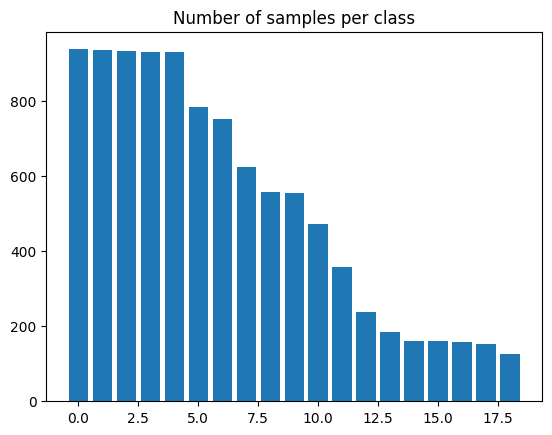

In [9]:
plt.bar(range(num_classes), eeg["label"].value_counts())
plt.title("Number of samples per class")
plt.show()

In [10]:
scaler = preprocessing.MinMaxScaler()
series_list = [
    scaler.fit_transform(np.asarray(i).reshape(-1, 1)) for i in eeg["raw_values"]
]

labels_list = [i for i in eeg["label"]]

In [11]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    series_list, labels_list, test_size=0.15, random_state=42, shuffle=True
)

print(
    f"Length of x_train : {len(x_train)}\nLength of x_test : {len(x_test)}\nLength of y_train : {len(y_train)}\nLength of y_test : {len(y_test)}"
)

x_train = np.asarray(x_train).astype(np.float32).reshape(-1, 512, 1)
y_train = np.asarray(y_train).astype(np.float32).reshape(-1, 1)
y_train = keras.utils.to_categorical(y_train)

x_test = np.asarray(x_test).astype(np.float32).reshape(-1, 512, 1)
y_test = np.asarray(y_test).astype(np.float32).reshape(-1, 1)
y_test = keras.utils.to_categorical(y_test)

Length of x_train : 8460
Length of x_test : 1494
Length of y_train : 8460
Length of y_test : 1494


In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

I0000 00:00:1762510622.044427   33871 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9060 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:08:00.0, compute capability: 7.5


In [13]:
vals_dict = {}
for i in eeg["label"]:
    if i in vals_dict.keys():
        vals_dict[i] += 1
    else:
        vals_dict[i] = 1
total = sum(vals_dict.values())

# Formula used - Naive method where
# weight = 1 - (no. of samples present / total no. of samples)
# So more the samples, lower the weight

weight_dict = {k: (1 - (v / total)) for k, v in vals_dict.items()}
print(weight_dict)

{1: 0.9872413100261201, 0: 0.975989551938919, 14: 0.9841269841269842, 13: 0.9061683745228049, 9: 0.9838255977496484, 8: 0.9059674502712477, 11: 0.9847297568816556, 10: 0.9063692987743621, 18: 0.9838255977496484, 17: 0.9057665260196905, 16: 0.9373116335141651, 15: 0.9065702230259193, 2: 0.9211372312638135, 12: 0.9525818766325096, 3: 0.9245529435402853, 4: 0.943841671689773, 5: 0.9641350210970464, 6: 0.981514968856741, 7: 0.9443439823186659}


In [14]:
def plot_history_metrics(history: keras.callbacks.History):
    total_plots = len(history.history)
    cols = total_plots // 2

    rows = total_plots // cols

    if total_plots % cols != 0:
        rows += 1

    pos = range(1, total_plots + 1)
    plt.figure(figsize=(15, 10))
    for i, (key, value) in enumerate(history.history.items()):
        plt.subplot(rows, cols, pos[i])
        plt.plot(range(len(value)), value)
        plt.title(str(key))
    plt.show()

In [15]:
def create_model():
    input_layer = keras.Input(shape=(512, 1))

    x = layers.Conv1D(
        filters=32, kernel_size=3, strides=2, activation="relu", padding="same"
    )(input_layer)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=64, kernel_size=3, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=128, kernel_size=5, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=256, kernel_size=5, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=512, kernel_size=7, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=1024,
        kernel_size=7,
        strides=2,
        activation="relu",
        padding="same",
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dropout(0.2)(x)

    x = layers.Flatten()(x)

    x = layers.Dense(4096, activation="relu")(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(
        2048, activation="relu", kernel_regularizer=keras.regularizers.L2()
    )(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(
        1024, activation="relu", kernel_regularizer=keras.regularizers.L2()
    )(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(
        128, activation="relu", kernel_regularizer=keras.regularizers.L2()
    )(x)
    output_layer = layers.Dense(num_classes, activation="softmax")(x)

    return keras.Model(inputs=input_layer, outputs=output_layer)

In [16]:
conv_model = create_model()
conv_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 256, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 128, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 64, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 32, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 16, 512)        │       918,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 8, 1024)        │     3,671,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       131,20

 Total params: 48,989,651 (186.88 MB)

 Trainable params: 48,985,619 (186.87 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [17]:
epochs = 30

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_top_k_categorical_accuracy",
        factor=0.2,
        patience=2,
        min_lr=0.000001,
    ),
]

optimizer = keras.optimizers.Adam(amsgrad=True, learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy()

In [18]:
conv_model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=[
        keras.metrics.TopKCategoricalAccuracy(k=3),
        keras.metrics.AUC(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
    ],
)

conv_model_history = conv_model.fit(
    train_dataset,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=test_dataset,
    class_weight=weight_dict,
)

Epoch 1/30


2025-11-07 11:17:05.770800: I external/local_xla/xla/service/service.cc:163] XLA service 0x7357f0027c70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-07 11:17:05.770812: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2025-11-07 11:17:05.877990: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-07 11:17:06.333055: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91500


 16/403 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - auc: 0.5629 - loss: 44.8334 - precision: 0.0998 - recall: 0.0355 - top_k_categorical_accuracy: 0.2359

I0000 00:00:1762510629.861852   33977 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


403/403 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - auc: 0.6630 - loss: 7.9664 - precision: 0.0972 - recall: 8.2742e-04 - top_k_categorical_accuracy: 0.2852 - val_auc: 0.6611 - val_loss: 3.1878 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_top_k_categorical_accuracy: 0.2617 - learning_rate: 0.0010
Epoch 2/30
403/403 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - auc: 0.6941 - loss: 2.7445 - precision: 0.5000 - recall: 3.5461e-04 - top_k_categorical_accuracy: 0.3165 - val_auc: 0.6848 - val_loss: 2.8684 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_top_k_categorical_accuracy: 0.3086 - learning_rate: 0.0010
Epoch 3/30
403/403 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - auc: 0.7089 - loss: 2.5785 - precision: 0.3333 - recall: 1.1820e-04 - top_k_categorical_accuracy: 0.3301 - val_auc: 0.6766 - val_loss: 2.8783 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_top_k_categorical_accuracy: 0.3106 - learning_rate: 0.0010
Epoch 4/30
403/403 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - auc: 0.

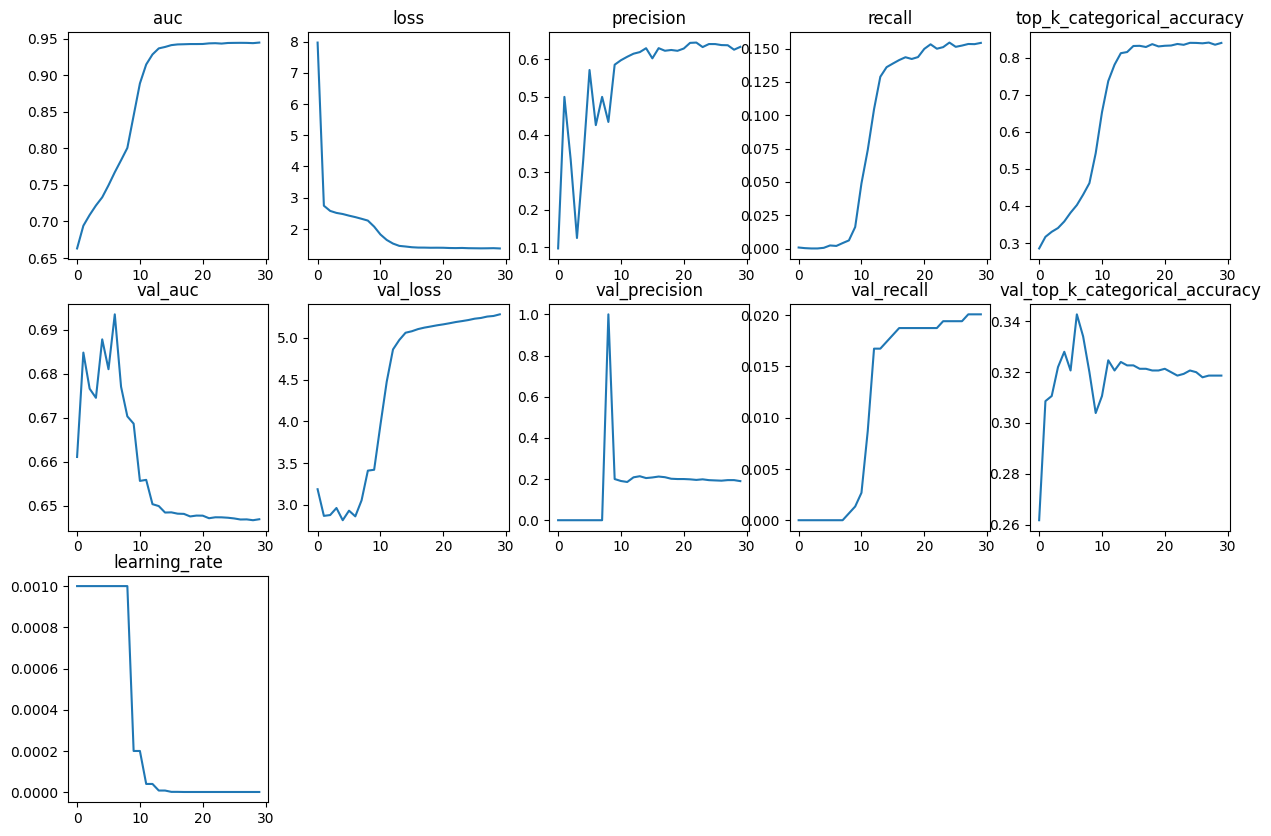

In [19]:
plot_history_metrics(conv_model_history)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6469 - loss: 5.2825 - precision: 0.1899 - recall: 0.0201 - top_k_categorical_accuracy: 0.3186
Loss : 5.2825117111206055
Top 3 Categorical Accuracy : 0.31860777735710144
Area under the Curve (ROC) : 0.6469468474388123
Precision : 0.18987341225147247
Recall : 0.0200803205370903


/home/xy/Desktop/ml/timeseries/tf_2.20/lib/python3.10/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(12, 512, 1))',)
  warnings.warn(msg)


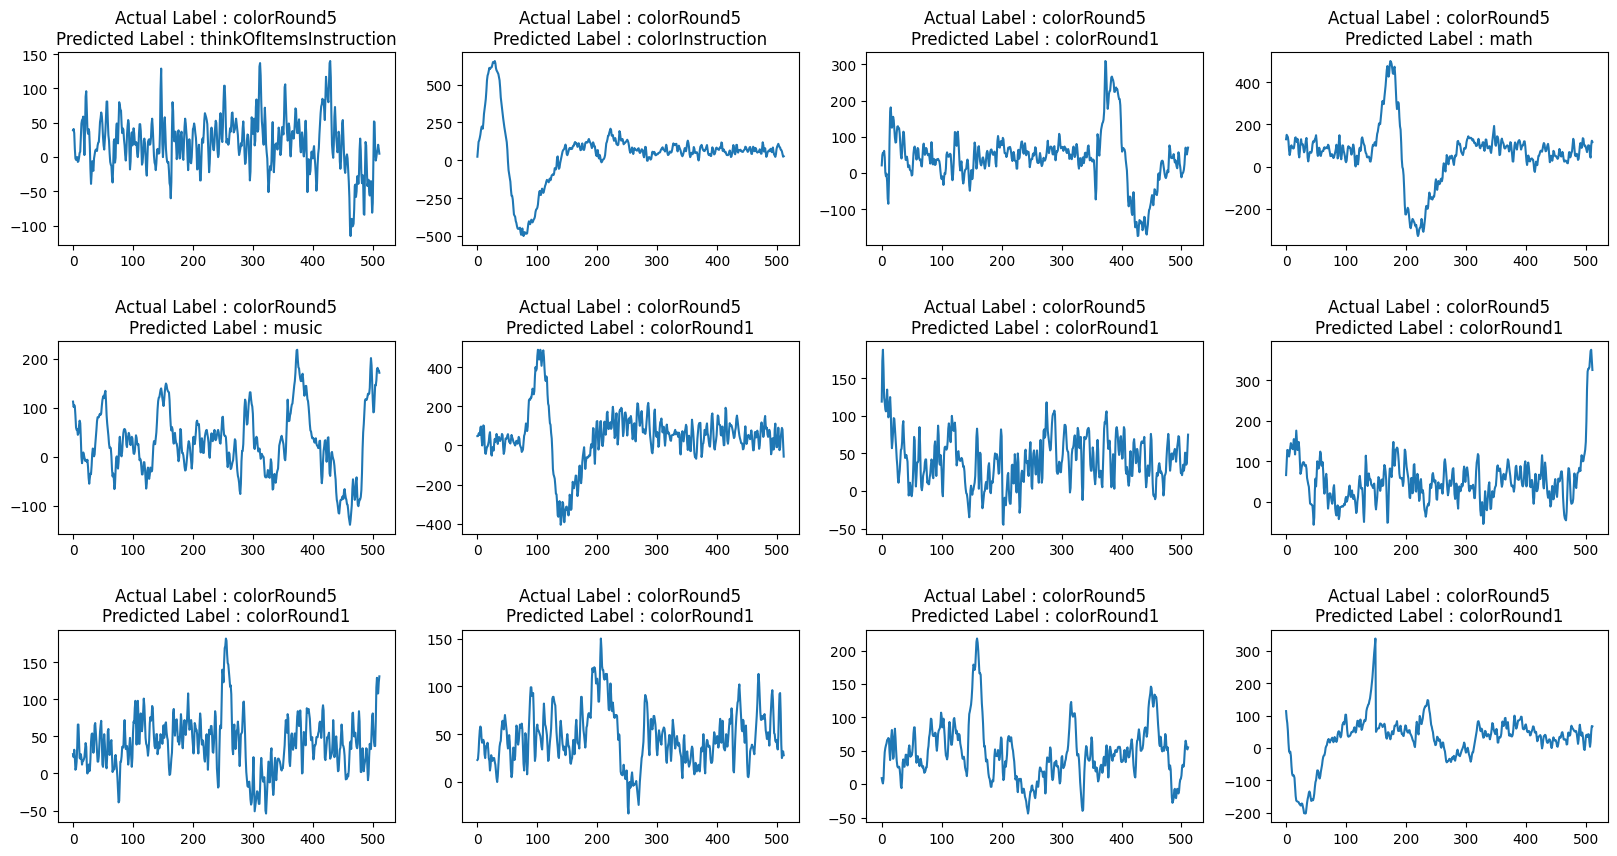

In [20]:
loss, accuracy, auc, precision, recall = conv_model.evaluate(test_dataset)
print(f"Loss : {loss}")
print(f"Top 3 Categorical Accuracy : {accuracy}")
print(f"Area under the Curve (ROC) : {auc}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")


def view_evaluated_eeg_plots(model):
    start_index = random.randint(10, len(eeg))
    end_index = start_index + 11
    data = eeg.loc[start_index:end_index, "raw_values"]
    data_array = [scaler.fit_transform(np.asarray(i).reshape(-1, 1)) for i in data]
    data_array = [np.asarray(data_array).astype(np.float32).reshape(-1, 512, 1)]
    original_labels = eeg.loc[start_index:end_index, "label"]
    predicted_labels = np.argmax(model.predict(data_array, verbose=0), axis=1)
    original_labels = [
        le.inverse_transform(np.array(label).reshape(-1))[0]
        for label in original_labels
    ]
    predicted_labels = [
        le.inverse_transform(np.array(label).reshape(-1))[0]
        for label in predicted_labels
    ]
    total_plots = 12
    cols = total_plots // 3
    rows = total_plots // cols
    if total_plots % cols != 0:
        rows += 1
    pos = range(1, total_plots + 1)
    fig = plt.figure(figsize=(20, 10))
    for i, (plot_data, og_label, pred_label) in enumerate(
        zip(data, original_labels, predicted_labels)
    ):
        plt.subplot(rows, cols, pos[i])
        plt.plot(plot_data)
        plt.title(f"Actual Label : {og_label}\nPredicted Label : {pred_label}")
        fig.subplots_adjust(hspace=0.5)
    plt.show()


view_evaluated_eeg_plots(conv_model)